# lab_session_4

# Case 9

In [12]:
import pandapower as pp
import pandas as pn
import numpy as np
import pandapower.networks
import pandapower.plotting as plot
%matplotlib inline

net = pandapower.networks.case9()
net

This pandapower network includes the following parameter tables:
   - bus (9 elements)
   - load (3 elements)
   - gen (2 elements)
   - ext_grid (1 element)
   - line (9 elements)
   - poly_cost (3 elements)
   - bus_geodata (9 elements)

In [13]:
net.line.loc[4]

name                         None
std_type                     None
from_bus                        5
to_bus                          6
length_km                     1.0
r_ohm_per_km            14.163975
x_ohm_per_km             119.9772
c_nf_per_km            465.775861
g_us_per_km                   0.0
max_i_ka                 0.251022
df                            1.0
parallel                        1
type                           ol
in_service                   True
max_loading_percent         100.0
Name: 4, dtype: object

In [14]:
net.line.loc[[3,4], ["length_km", "r_ohm_per_km", "x_ohm_per_km", "c_nf_per_km"]]

,length_km,r_ohm_per_km,x_ohm_per_km,c_nf_per_km
3,1.0,0.000000,69.74865,0.000000
4,1.0,14.163975,119.97720,465.775861


In [15]:
pp.runpp(net, max_iteration=100, numba=False)

In [16]:
net.res_bus

,vm_pu,va_degree,p_mw,q_mvar
0,1.000000,0.000000,-71.954702,-24.068958
1,1.000000,9.668741,-163.000000,-14.460120
2,1.000000,4.771073,-85.000000,3.649026
3,0.987007,-2.406644,0.000000,0.000000
4,0.975472,-4.017264,90.000000,30.000000
5,1.003375,1.925602,0.000000,0.000000
6,0.985645,0.621545,100.000000,35.000000
7,0.996185,3.799120,0.000000,0.000000
8,0.957621,-4.349934,125.000000,50.000000


In [17]:
import time
start_time = time.time()
pp.runpp(net,numba=False)
print("Elapsed time: {:2.4f} ms".format(1000*(time.time() - start_time)))

Elapsed time: 24.3030 ms


use_bus_geodata is automatically set to True, since net.line_geodata is empty.


<AxesSubplot: >

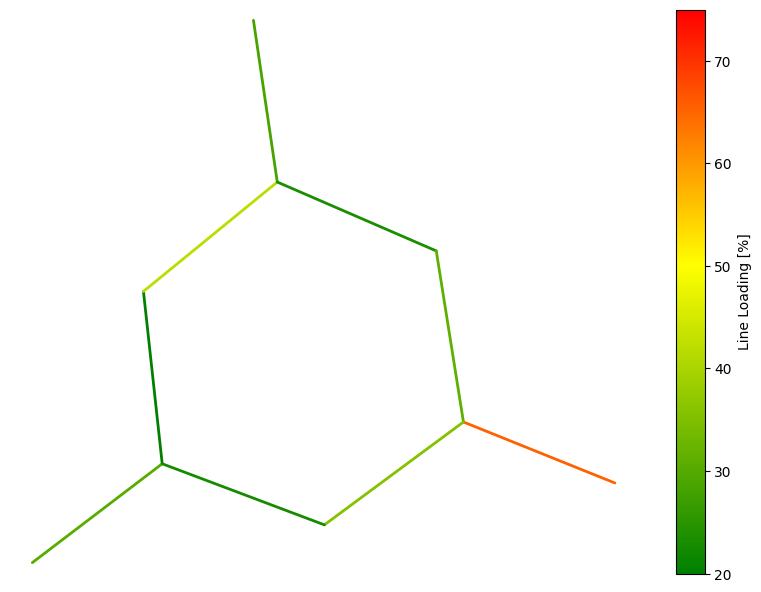

In [22]:
cmap_list=[(20, "green"), (50, "yellow"), (75, "red")]
cmap, norm = plot.cmap_continuous(cmap_list)

lc = plot.create_line_collection(net, net.line.index, zorder=1, cmap=cmap, norm=norm, linewidths=2)
plot.draw_collections([lc], figsize=(8,6))

<AxesSubplot: >

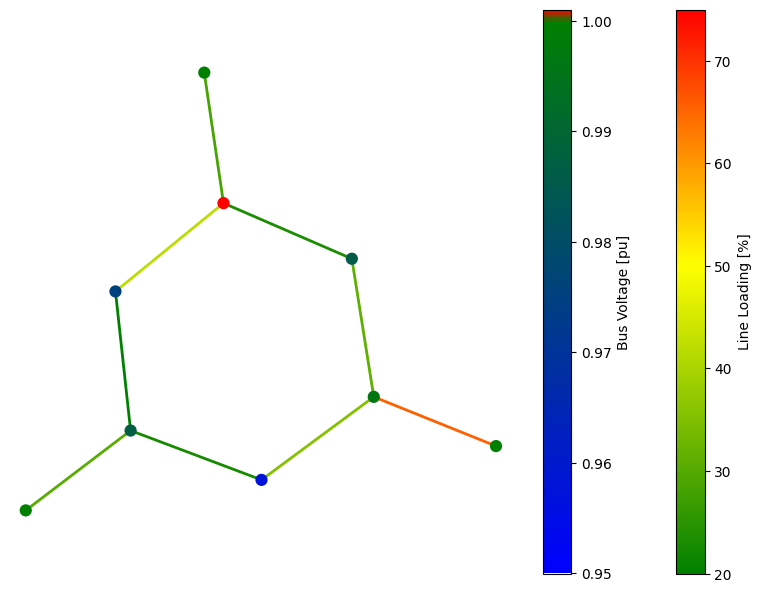

In [23]:
cmap_list=[(0.95, "blue"), (1.0, "green"), (1.001, "red")]
cmap, norm = plot.cmap_continuous(cmap_list)
bc = plot.create_bus_collection(net, net.bus.index, size=0.05, zorder=2, cmap=cmap, norm=norm)
plot.draw_collections([lc, bc], figsize=(8,6))

In [24]:
pp.runpp(net, numba=False) #Newton Rapson
import time
start_time = time.time()
pp.runpp(net,numba=False)
print("Elapsed time: {:2.4f} ms".format(1000*(time.time() - start_time)))

Elapsed time: 19.1207 ms


In [25]:
pp.runpp(net, 'gs', numba=False) #Gauss-Siedel
import time
start_time = time.time()
pp.runpp(net,numba=False)
print("Elapsed time: {:2.4f} ms".format(1000*(time.time() - start_time)))

Elapsed time: 19.0480 ms


In [26]:
pp.runpp(net, 'fdbx', numba=False) #fast coupled
import time
start_time = time.time()
pp.runpp(net,numba=False)
print("Elapsed time: {:2.4f} ms".format(1000*(time.time() - start_time)))

Elapsed time: 21.6973 ms


In [27]:
pp.runpp(net, init='dc', numba=False) #DC
import time
start_time = time.time()
pp.runpp(net,numba=False)
print("Elapsed time: {:2.4f} ms".format(1000*(time.time() - start_time)))

Elapsed time: 19.8920 ms


# Case IEEE30

In [28]:
net = pandapower.networks.case_ieee30()

In [29]:
pp.runpp(net, numba=False) #Newton Rapson
import time
start_time = time.time()
pp.runpp(net,numba=False)
print("Elapsed time: {:2.4f} ms".format(1000*(time.time() - start_time)))

Elapsed time: 23.0296 ms


In [30]:

pp.runpp(net, 'gs', numba=False) #Gauss-Siedel
import time
start_time = time.time()
pp.runpp(net,numba=False)
print("Elapsed time: {:2.4f} ms".format(1000*(time.time() - start_time)))

Elapsed time: 19.6841 ms


In [31]:
pp.runpp(net, 'fdbx', numba=False) #fast coupled
import time
start_time = time.time()
pp.runpp(net,numba=False)
print("Elapsed time: {:2.4f} ms".format(1000*(time.time() - start_time)))

Elapsed time: 21.5247 ms


In [32]:
pp.runpp(net, init='dc', numba=False) #DC
import time
start_time = time.time()
pp.runpp(net,numba=False)
print("Elapsed time: {:2.4f} ms".format(1000*(time.time() - start_time)))

Elapsed time: 21.8887 ms


# Case 118

In [33]:
net = pandapower.networks.case118()

In [34]:
pp.runpp(net, numba=False) #Newton Rapson
import time
start_time = time.time()
pp.runpp(net,numba=False)
print("Elapsed time: {:2.4f} ms".format(1000*(time.time() - start_time)))

Elapsed time: 24.9376 ms


In [46]:
pp.runpp(net, 'gs', numba=False) #Gauss-Siedel
import time
start_time = time.time()
pp.runpp(net,numba=False)
print("Elapsed time: {:2.4f} ms".format(1000*(time.time() - start_time)))

In [ ]:
pp.runpp(net, 'fdbx', numba=False) #fast coupled
import time
start_time = time.time()
pp.runpp(net,numba=False)
print("Elapsed time: {:2.4f} ms".format(1000*(time.time() - start_time)))

Elapsed time: 21.3187 ms


In [ ]:
pp.runpp(net, init='dc', numba=False) #fast coupled
import time
start_time = time.time()
pp.runpp(net,numba=False)
print("Elapsed time: {:2.4f} ms".format(1000*(time.time() - start_time)))

Elapsed time: 20.6282 ms


# Case 300


In [ ]:
net = pandapower.networks.case300()

In [ ]:
pp.runpp(net, numba=False) #Newton Rapson
import time
start_time = time.time()
pp.runpp(net,numba=False)
print("Elapsed time: {:2.4f} ms".format(1000*(time.time() - start_time)))

Elapsed time: 31.7349 ms


In [ ]:
pp.runpp(net, 'fdbx', numba=False) #fast coupled
import time
start_time = time.time()
pp.runpp(net,numba=False)
print("Elapsed time: {:2.4f} ms".format(1000*(time.time() - start_time)))

Elapsed time: 44.0223 ms


In [ ]:
pp.runpp(net, init='dc', numba=False) #DC
import time
start_time = time.time()
pp.runpp(net,numba=False)
print("Elapsed time: {:2.4f} ms".format(1000*(time.time() - start_time)))

Elapsed time: 36.9937 ms


# Case 3120sp

In [ ]:
net = pandapower.networks.case3120sp()

In [ ]:
pp.runpp(net, numba=False) #Newton Rapson
import time
start_time = time.time()
pp.runpp(net,numba=False)
print("Elapsed time: {:2.4f} ms".format(1000*(time.time() - start_time)))

Elapsed time: 154.7985 ms


In [ ]:
pp.runpp(net, 'fdbx', numba=False) #fast coupled
import time
start_time = time.time()
pp.runpp(net,numba=False)
print("Elapsed time: {:2.4f} ms".format(1000*(time.time() - start_time)))

Elapsed time: 156.5723 ms


In [ ]:
pp.runpp(net, init='dc', numba=False) #DC
import time
start_time = time.time()
pp.runpp(net,numba=False)
print("Elapsed time: {:2.4f} ms".format(1000*(time.time() - start_time)))

Elapsed time: 142.7588 ms
